**EXP 4  :  ASK**


**NAME  :  DHEVI BALA SHREE P**


**REG NO  :  212224060063**

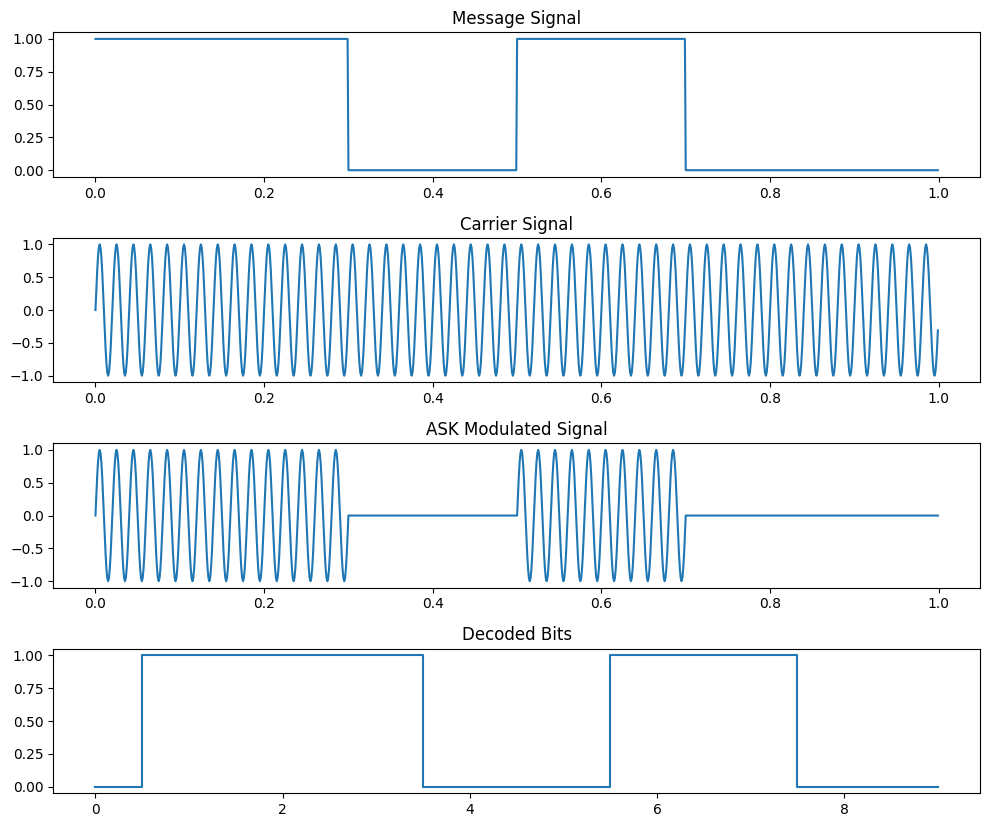

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# Low-pass filter
def lpf(x, fc, fs):
    b, a = butter(4, fc/(0.5*fs), 'low')
    return lfilter(b, a, x)

# Parameters
fs, fc, br, T = 1000, 50, 10, 1
t = np.arange(0, T, 1/fs)

# Message signal
bits = np.random.randint(0, 2, br)
msg = np.repeat(bits, fs//br)

# Carrier signal
carrier = np.sin(2*np.pi*fc*t)

# ASK modulation & demodulation
ask = msg * carrier
demod = lpf(ask * carrier, fc, fs)
decoded = (demod[::fs//br] > 0.25).astype(int)

# Plot
plt.figure(figsize=(10,9))

plt.subplot(4,1,1)
plt.plot(t, msg)
plt.title("Message Signal")

plt.subplot(4,1,2)
plt.plot(t, carrier)
plt.title("Carrier Signal")

plt.subplot(4,1,3)
plt.plot(t, ask)
plt.title("ASK Modulated Signal")

plt.subplot(4,1,4)
plt.step(range(len(decoded)), decoded, where='mid')
plt.title("Decoded Bits")

plt.tight_layout(rect=[0,0,1,0.93])
plt.show()